In [3]:
#import package
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt
import time

from keras.models import Sequential, Model
from keras.layers import Input, RepeatVector, Merge
from keras.layers.core import Dense, Dropout, Activation 
from keras.layers.recurrent import LSTM, GRU
from keras import optimizers

%matplotlib inline

print('Done')

Using TensorFlow backend.


Done


In [370]:
def readData():
    data = pd.read_csv('C:/Users/yoon/Python/Stock_Prediction/data/Samsung_20_DIV.csv', parse_dates = [0])
    raw_dates = data.loc[30:, 'date'].reset_index(drop=True)
    del data['date']
    raw_data = data.loc[30:].reset_index(drop=True)
    return raw_data, raw_dates

def split_into_chunks(data, train, predict, step):
    train_set, label_set, evaluation_set = [], [], []
        
    for i in range(0, len(data), step):
        try:  
            temp_train = data.loc[i:i+train-1, 'dSMA':'dCCI'].as_matrix()
            #temp_train = preprocessing.scale(temp_train)
            temp_label_set = np.array(data.loc[i:i+train-1, 'close'])
            temp_eval = np.array(data.loc[i+train-1+predict, 'close'])
            
            mean_ = temp_label_set.mean()
            scale_ = temp_label_set.std()
            temp_label = (temp_eval- mean_) / scale_

        except:
            break
        train_set.append(temp_train)
        label_set.append(temp_label)
        evaluation_set.append([temp_eval, mean_, scale_])
        
    return train_set, label_set, evaluation_set

def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a, b

def create_Xt_Yt_Zt(X, y, z, percentage=0.9):
#    X, y = shuffle_in_unison(X, y)
    X_train1 = X[0:int(len(X) * percentage)]
    X_train2 = X[0:int(len(X) * percentage)]
    Y_train = y[0:int(len(y) * percentage)]
#    X_train, Y_train = shuffle_in_unison(X_train, Y_train)
    X_test1 = X[int(len(X) * percentage):]
    X_test2 = X[int(len(X) * percentage):]
    Y_test = y[int(len(X) * percentage):]
    Z_test = z[int(len(X) * percentage):]
    return X_train1, X_train2, Y_train, X_test1, X_test2, Y_test, Z_test

print('Done')

Done


In [371]:
timeSeriesList, dates = readData()
TIMESTEPS = 10
TARGET_TIME = 1
STEP_SIZE = 1
DATA_DIM = 10

print('Done')

Done


In [372]:
X, Y, Z = split_into_chunks(timeSeriesList, TIMESTEPS, TARGET_TIME, STEP_SIZE)
X, Y, Z = np.array(X[:-1]), np.array(Y[:-1]), np.array(Z[:-1])
X_train1, X_train2, Y_train, X_test1, X_test2, Y_test, Z_test = create_Xt_Yt_Zt(X, Y, Z)

print('Done')

Done


In [401]:
encoder_A = Sequential()
encoder_A.add(LSTM(16, return_sequences=True, input_shape=(TIMESTEPS, DATA_DIM)))
encoder_A.add(LSTM(4, return_sequences=False))

encoder_B = Sequential()
encoder_B.add(LSTM(16, return_sequences=True, input_shape=(TIMESTEPS, DATA_DIM)))
encoder_B.add(LSTM(4, return_sequences=False))

decoder = Sequential()
decoder.add(Merge([encoder_A, encoder_B], mode = 'concat'))
decoder.add(Dense(1, activation = 'sigmoid'))

decoder.compile(optimizer='adam', loss='mse',
               metrics=['mse'])
print("Done")

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


Done


In [402]:
print("Training...")
decoder.fit([X_train1, X_train2], 
            Y_train, 
            epochs = 100,
            batch_size = 128,
            verbose=1)

print("Evaluating...")
score = decoder.evaluate([X_test1, X_test2], Y_test, batch_size=128)
print("\nTest loss and accuracy:" + str(score))

print('Done')

Training...
Epoch 1/100
4659/4659 [==============================] - 52s - loss: 2.8937 - mean_squared_error: 2.8937    
Epoch 2/100
4659/4659 [==============================] - 5s - loss: 2.7203 - mean_squared_error: 2.7203     
Epoch 3/100
4659/4659 [==============================] - 5s - loss: 2.5990 - mean_squared_error: 2.5990     
Epoch 4/100
4659/4659 [==============================] - 5s - loss: 2.4826 - mean_squared_error: 2.4826     
Epoch 5/100
4659/4659 [==============================] - 5s - loss: 2.3539 - mean_squared_error: 2.3539     
Epoch 6/100
4659/4659 [==============================] - 5s - loss: 2.2583 - mean_squared_error: 2.2583     
Epoch 7/100
4659/4659 [==============================] - 5s - loss: 2.1995 - mean_squared_error: 2.1995     
Epoch 8/100
4659/4659 [==============================] - 5s - loss: 2.1627 - mean_squared_error: 2.1627     
Epoch 9/100
4659/4659 [==============================] - 5s - loss: 2.1404 - mean_squared_error: 2.1404     
Epoch 1

4659/4659 [==============================] - 5s - loss: 2.0023 - mean_squared_error: 2.0023     
Epoch 75/100
4659/4659 [==============================] - 5s - loss: 2.0033 - mean_squared_error: 2.0033     
Epoch 76/100
4659/4659 [==============================] - 5s - loss: 2.0009 - mean_squared_error: 2.0009     
Epoch 77/100
4659/4659 [==============================] - 5s - loss: 1.9995 - mean_squared_error: 1.9995     
Epoch 78/100
4659/4659 [==============================] - 5s - loss: 1.9981 - mean_squared_error: 1.9981     
Epoch 79/100
4659/4659 [==============================] - 5s - loss: 2.0023 - mean_squared_error: 2.0023     
Epoch 80/100
4659/4659 [==============================] - 5s - loss: 1.9949 - mean_squared_error: 1.9949     
Epoch 81/100
4659/4659 [==============================] - 5s - loss: 1.9941 - mean_squared_error: 1.9941     
Epoch 82/100
4659/4659 [==============================] - 5s - loss: 1.9925 - mean_squared_error: 1.9925     
Epoch 83/100
4659/4659 

In [403]:
predicted = decoder.predict([X_test1, X_test2])

for i in range (0, len(predicted)):
    predicted[i] = (predicted[i] * Z_test[i,2]) + Z_test[i,1]

evaluation = Z_test[:,0]

print("Done")

In [405]:
j = 0
k = 0
for i in range(1,300):
    pred_sign = predicted[i]-evaluation[i-1]
    eval_sign = evaluation[i]-evaluation[i-1]
    if pred_sign * eval_sign > 0 :
        j = j+1
    elif pred_sign * eval_sign < 0:
        k = k+1
        
print(j/(j+k))

print("Done")

0.5481481481481482
Done


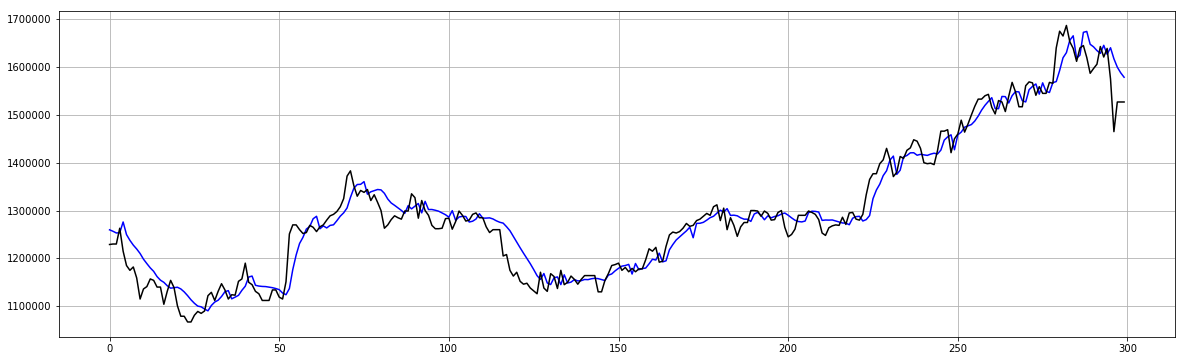

In [406]:
plt.figure(figsize=(20, 6))
#plt.xticks(np.arange(0,201,5))
#plt.yticks(np.arange(0,1.1,0.1))
plt.grid(True)
plt.plot(predicted[:300], color='blue')
#plt.scatter(range(0,100),predicted[:100].round(), color='red', marker='x')
plt.plot(evaluation[:300], color='black')